# Part I - WeatherPy
#### By raulfloresp
----

#### Purpose of analysis:
Creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, I utilized a simple Python library, the OpenWeatherMap API, and a set of weather definitions to create a representative model of weather across world cities.

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv as csv
from scipy.stats import linregress

# Import API key
from config1 import api_key

In [4]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [7]:
cities

['ostrovnoy',
 'petawawa',
 'taolanaro',
 'port moresby',
 'belushya guba',
 'oksfjord',
 'kibara',
 'vaini',
 'wainwright',
 'barentsburg',
 'cape town',
 'port elizabeth',
 'rawson',
 'kapaa',
 'bredasdorp',
 'barrow',
 'corinto',
 'thompson',
 'zhurivka',
 'ushuaia',
 'avarua',
 'castro',
 'yellowknife',
 'qaanaaq',
 'torbay',
 'geraldton',
 'vila franca do campo',
 'hasaki',
 'tucuma',
 'lebu',
 'arraial do cabo',
 'shimoda',
 'butaritari',
 'hobart',
 'cabo san lucas',
 'zhongshu',
 'palabuhanratu',
 'baykit',
 'avera',
 'borogontsy',
 'faanui',
 'lakes entrance',
 'kuandian',
 'georgetown',
 'norman wells',
 'tual',
 'ormara',
 'samarai',
 'rikitea',
 'broome',
 'emilio carranza',
 'georgiyevka',
 'kaeo',
 'victoria',
 'bluff',
 'mayo',
 'novopokrovka',
 'constitucion',
 'jiroft',
 'sibolga',
 'mareeba',
 'mataura',
 'chute-aux-outardes',
 'pitimbu',
 'burnie',
 'doka',
 'hithadhoo',
 'punta arenas',
 'tutoia',
 'aksarka',
 'bar-le-duc',
 'jardim',
 'san patricio',
 'vila velha',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [9]:
# Use Openweather api to get the weather data needed from those cities.
name = []
temp = []
humidity = []
clouds = []
wind = []
lat = []
lon = []
country = []

# Build query URL
print("-----------------------")
print("START PROCESSING DATA")
print("-----------------------")

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    if response.status_code == 200:
        response = response.json()
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        name.append(response["name"])
        #print log of each city as it'sbeing processed (with the city number and city name
        print(f"Processing record for CITY: " + city, " Where query_url is: " + query_url)
print("-----------------------")
print("END PROCESSING DATA")
print("-----------------------")

-----------------------
START PROCESSING DATA
-----------------------
Processing record for CITY: ostrovnoy  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=ostrovnoy&units=imperial
Processing record for CITY: petawawa  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=petawawa&units=imperial
Processing record for CITY: port moresby  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=port moresby&units=imperial
Processing record for CITY: oksfjord  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=oksfjord&units=imperial
Processing record for CITY: kibara  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=kibara&units=imperial
Processing record for CITY: vaini  Where query_url is: http://api.openweat

Processing record for CITY: victoria  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=victoria&units=imperial
Processing record for CITY: bluff  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=bluff&units=imperial
Processing record for CITY: mayo  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=mayo&units=imperial
Processing record for CITY: novopokrovka  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=novopokrovka&units=imperial
Processing record for CITY: constitucion  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=constitucion&units=imperial
Processing record for CITY: sibolga  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=sib

Processing record for CITY: clyde river  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=clyde river&units=imperial
Processing record for CITY: kodiak  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=kodiak&units=imperial
Processing record for CITY: noyabrsk  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=noyabrsk&units=imperial
Processing record for CITY: dangriga  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=dangriga&units=imperial
Processing record for CITY: albany  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=albany&units=imperial
Processing record for CITY: tecpan  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=tecpan&u

Processing record for CITY: half moon bay  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=half moon bay&units=imperial
Processing record for CITY: vanavara  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=vanavara&units=imperial
Processing record for CITY: puerto el triunfo  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=puerto el triunfo&units=imperial
Processing record for CITY: pringsewu  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=pringsewu&units=imperial
Processing record for CITY: ryotsu  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=ryotsu&units=imperial
Processing record for CITY: nuuk  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b

Processing record for CITY: wagar  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=wagar&units=imperial
Processing record for CITY: constantine  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=constantine&units=imperial
Processing record for CITY: waitara  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=waitara&units=imperial
Processing record for CITY: nuevo laredo  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=nuevo laredo&units=imperial
Processing record for CITY: tuatapere  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=tuatapere&units=imperial
Processing record for CITY: murupara  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9

Processing record for CITY: bubaque  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=bubaque&units=imperial
Processing record for CITY: vao  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=vao&units=imperial
Processing record for CITY: ancud  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=ancud&units=imperial
Processing record for CITY: matay  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=matay&units=imperial
Processing record for CITY: hervey bay  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=hervey bay&units=imperial
Processing record for CITY: hammerfest  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=hammerfest&units=imper

Processing record for CITY: ambilobe  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=ambilobe&units=imperial
Processing record for CITY: great falls  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=great falls&units=imperial
Processing record for CITY: san pedro  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=san pedro&units=imperial
Processing record for CITY: labrea  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=labrea&units=imperial
Processing record for CITY: gangapur  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=gangapur&units=imperial
Processing record for CITY: rudbar  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=ru

Processing record for CITY: dubbo  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=dubbo&units=imperial
Processing record for CITY: najran  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=najran&units=imperial
Processing record for CITY: upernavik  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=upernavik&units=imperial
Processing record for CITY: esil  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=esil&units=imperial
Processing record for CITY: price  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=price&units=imperial
Processing record for CITY: hearst  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=hearst&units=imperial
Proces

Processing record for CITY: upata  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=upata&units=imperial
Processing record for CITY: naze  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=naze&units=imperial
Processing record for CITY: emerald  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=emerald&units=imperial
Processing record for CITY: pachino  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=pachino&units=imperial
Processing record for CITY: fortuna  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=fortuna&units=imperial
Processing record for CITY: yerbogachen  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=yerbogachen&units=imp

Processing record for CITY: pacific grove  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=pacific grove&units=imperial
Processing record for CITY: chipinge  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=chipinge&units=imperial
Processing record for CITY: at-bashi  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=at-bashi&units=imperial
Processing record for CITY: suntar  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=suntar&units=imperial
Processing record for CITY: miracema do tocantins  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=miracema do tocantins&units=imperial
Processing record for CITY: kichera  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d

Processing record for CITY: jizan  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=jizan&units=imperial
Processing record for CITY: nueva loja  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=nueva loja&units=imperial
Processing record for CITY: palmer  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=palmer&units=imperial
Processing record for CITY: caravelas  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=caravelas&units=imperial
Processing record for CITY: bay roberts  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=bay roberts&units=imperial
Processing record for CITY: kayerkan  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=ka

Processing record for CITY: goderich  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=goderich&units=imperial
Processing record for CITY: dunda  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=dunda&units=imperial
Processing record for CITY: aloleng  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=aloleng&units=imperial
Processing record for CITY: fethiye  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=fethiye&units=imperial
Processing record for CITY: maldonado  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=maldonado&units=imperial
Processing record for CITY: mpika  Where query_url is: http://api.openweathermap.org/data/2.5/weather?appid=f3f8549d4a030ca7b73cbfc8d924fc9c&q=mpika&units=imp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_df = pd.DataFrame({"City": name,
                        "Temperature (F)": temp,
                        "Humidity (%)": humidity,
                        "Cloudiness (%)": clouds,
                        "Wind Speed (mph)": wind,
                        "Latitude": lat, 
                        "Longitude": lon,
                        "Country": country
                       })
weather_df.head()

,City,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude,Country
0,Ostrovnoy,55.00,55,0,3.60,68.05,39.51,RU
1,Petawawa,69.80,88,90,2.77,45.90,-77.33,CA
2,Port Moresby,82.40,78,75,17.22,-9.44,147.18,PG
3,Øksfjord,58.41,77,96,6.93,70.24,22.35,NO
4,Kibara,66.20,55,20,16.11,-2.15,33.45,TZ


In [11]:
weather_df.count()

City                566
Temperature (F)     566
Humidity (%)        566
Cloudiness (%)      566
Wind Speed (mph)    566
Latitude            566
Longitude           566
Country             566
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Create a new dataframe for cities where Humidity > 100

In [12]:
#  Get the indices of cities that have humidity over 100%.
weather_df_100 = weather_df[weather_df.iloc[:,2] > 100]     
weather_df_100

,City,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude,Country


#### No cities with Humidity > 100 are found

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [28]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
weather_df.to_csv("Output/cities.csv", index = False)
weather_df

,City,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude,Country
0,Ostrovnoy,55.00,55,0,3.60,68.05,39.51,RU
1,Petawawa,69.80,88,90,2.77,45.90,-77.33,CA
2,Port Moresby,82.40,78,75,17.22,-9.44,147.18,PG
3,Øksfjord,58.41,77,96,6.93,70.24,22.35,NO
4,Kibara,66.20,55,20,16.11,-2.15,33.45,TZ
...,...,...,...,...,...,...,...,...
561,Tahoua,77.00,88,0,9.17,14.89,5.27,NE
562,Kumul,88.45,20,17,8.79,42.80,93.45,CN
563,New Waterford,73.65,73,61,5.37,40.85,-80.61,US
564,Santarém,75.20,100,30,2.24,-2.44,-54.71,BR


In [30]:
cities_html = weather_df.to_html()
print(cities_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>City</th>
      <th>Temperature (F)</th>
      <th>Humidity (%)</th>
      <th>Cloudiness (%)</th>
      <th>Wind Speed (mph)</th>
      <th>Latitude</th>
      <th>Longitude</th>
      <th>Country</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Ostrovnoy</td>
      <td>55.00</td>
      <td>55</td>
      <td>0</td>
      <td>3.60</td>
      <td>68.05</td>
      <td>39.51</td>
      <td>RU</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Petawawa</td>
      <td>69.80</td>
      <td>88</td>
      <td>90</td>
      <td>2.77</td>
      <td>45.90</td>
      <td>-77.33</td>
      <td>CA</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Port Moresby</td>
      <td>82.40</td>
      <td>78</td>
      <td>75</td>
      <td>17.22</td>
      <td>-9.44</td>
      <td>147.18</td>
      <td>PG</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Øksfjord</td>
      <td

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
#### * After each plot add a sentence or too explaining what the code is and analyzing.

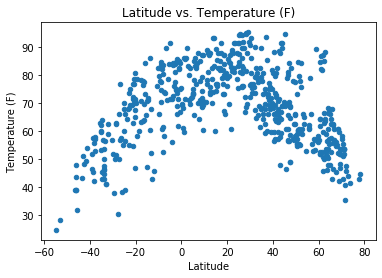

In [24]:
#Build the plot Latitude vs. Temperature
weather_df.plot.scatter(x= "Latitude", y= "Temperature (F)", title="Latitude vs. Temperature (F)")
plt.savefig("Latitude_vs_Temperature.png")

* A scatter plot is a type of a mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.
* A scatter plot can be used either when one continuous variable that is under the control of the experimenter and the other depends on it. In this case we are analyzing how the Temperature behaves along the Latitude of cities. 
* The measured or dependent variable is customarily plotted along the vertical axis, that is the case of Temperature. The scatter plot can suggest various kinds of correlations between variables with a certain confidence interval.
* We can see that Temperature on the low and high values of Latitude is cold. That is an expected behavior, because those cities are close to the poles. Cities at the center of the earth are quite warm and hot and it is also demonstrated on the scatter plot.

## Latitude vs. Humidity Plot

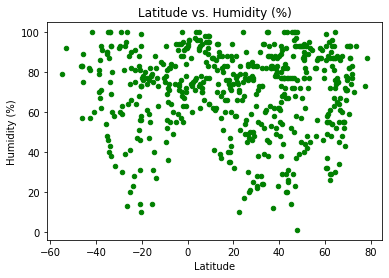

In [21]:
#Build the plot Latitude vs. Humidity
weather_df.plot.scatter(x= "Latitude", y= "Humidity (%)", title="Latitude vs. Humidity (%)",  c="g")
plt.savefig("Latitude_vs_Humidity.png")

* The measured or dependent variable is customarily plotted along the vertical axis, that is the case of Humidity. The scatter plot can suggest various kinds of correlations between variables with a certain confidence interval.
* We can see some kind of correlation between these two variables. Humidity is more correlated in cities with Latitude above 0, so it increases when we move to cities with Latitude between 60 to 80.

## Latitude vs. Cloudiness Plot

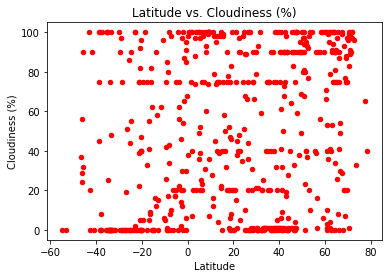

In [22]:
#Build the plot Latitude vs Cloudiness
weather_df.plot.scatter(x= "Latitude", y= "Cloudiness (%)", title="Latitude vs. Cloudiness (%)",  c="r")
plt.savefig("Latitude_vs_Cloudiness.png")

* The measured or dependent variable is customarily plotted along the vertical axis, that is the case of Clodiness. The scatter plot can suggest various kinds of correlations between variables with a certain confidence interval.
* We can not appreciate a clear correlation between two variables bacuase all the points are spread along the graph.

## Latitude vs. Wind Speed Plot

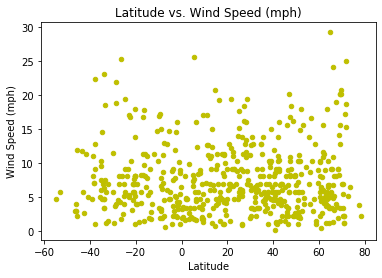

In [23]:
#Build the plot Latitude vs Wind Speed
weather_df.plot.scatter(x= "Latitude", y= "Wind Speed (mph)", title="Latitude vs. Wind Speed (mph)",  c="y")
plt.savefig("Latitude_vs_WindSpeed.png")

* The measured or dependent variable is customarily plotted along the vertical axis, that is the case of Wind Speed. The scatter plot can suggest various kinds of correlations between variables with a certain confidence interval.
* We can not appreciate a clear correlation between two variables bacuase all the points are spread along the graph.

## Linear Regression

To run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [100]:
#Create a function to create Linear Regression plots

def linear_regresion_plot(x_values, y_values, x_label, y_label, label_pos, plot_title, plot_number):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The regression -squared is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,label_pos,fontsize=15,color="blue")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{plot_title}")
    plt.savefig(f"Output/fig_reg{plot_number}.png")
    plt.show()

In [85]:
# Create Northern and Southern Hemisphere DataFrames

nothern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0.0]
nothern_hemisphere.reset_index(inplace=True)

southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0.0]
southern_hemisphere.reset_index(inplace=True)

In [86]:
#nothern_hemisphere cities
nothern_hemisphere.head()

,index,City,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude,Country
0,3,Ndélé,75.49,80,87,4.72,8.41,20.65,CF
1,4,Synya,64.33,62,98,7.94,65.37,58.04,RU
2,5,Chaiya,90.86,70,40,16.11,9.39,99.20,TH
3,6,Hilo,76.08,69,90,3.36,19.73,-155.09,US
4,7,Chara,69.37,25,39,2.48,56.91,118.26,RU


In [87]:
#southern_hemisphere cities
southern_hemisphere.head()

,index,City,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude,Country
0,0,Caconda,52.11,58,7,3.89,-13.73,15.07,AO
1,1,Punta Arenas,39.09,86,75,4.70,-53.15,-70.92,CL
2,2,Ushuaia,39.20,93,75,4.70,-54.80,-68.30,AR
3,8,Atuona,81.37,77,3,13.09,-9.80,-139.03,PF
4,9,Ambilobe,80.74,50,56,5.53,-13.20,49.05,MG


####  1. Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression -squared is: -0.7544916785155428


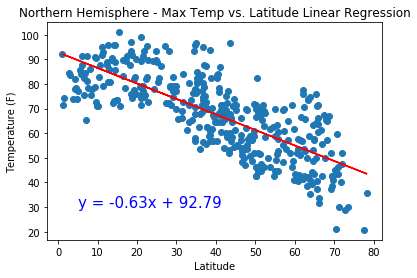

In [102]:
x_label = "Latitude"
y_label = "Temperature (F)"
label_pos = (5,30)
plot_title= "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
linear_regresion_plot(nothern_hemisphere[x_label],nothern_hemisphere[y_label],x_label,y_label,label_pos,plot_title,1)

Linear regression has a r-squared value of -0.75. There is a medium to hight negative linear relation between latitude and temperature when both are descreasing in the Northern Hemisphere. We can observe that 75% of the variance is explained by this linear model.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression -squared is: 0.8144203982789318


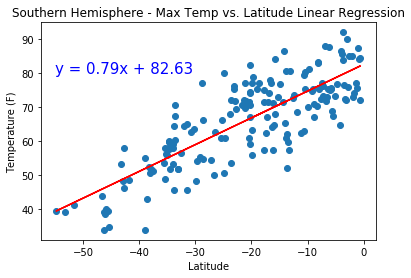

In [107]:
x_label = "Latitude"
y_label = "Temperature (F)"
label_pos = (-55,80)
plot_title= "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
linear_regresion_plot(southern_hemisphere[x_label],southern_hemisphere[y_label],x_label,y_label,label_pos,plot_title,2)

Linear regression has a r-squared value of -0.81. There is a hight linear relation between latitude and temperature when both are increasing in the Southern Hemisphere. We can observe that 81% of the variance is explained by this linear model - strong correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression -squared is: -0.03895416860684649


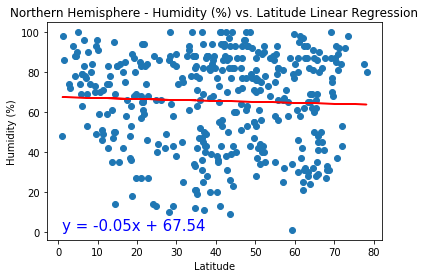

In [111]:
x_label = "Latitude"
y_label = "Humidity (%)"
label_pos = (1,1)
plot_title= "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
linear_regresion_plot(nothern_hemisphere[x_label],nothern_hemisphere[y_label],x_label,y_label,label_pos,plot_title,3)

Linear regression has a r-squared value of -0.038. There is a minimum linear relation between latitude and humidity when both are increasing in the Northern Hemisphere. We can observe that 3.8% of the variance is explained by this linear model - minimum correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression -squared is: 0.06791727202271125


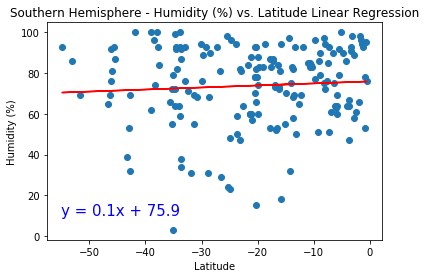

In [119]:
x_label = "Latitude"
y_label = "Humidity (%)"
label_pos = (-55,10)
plot_title= "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
linear_regresion_plot(southern_hemisphere[x_label],southern_hemisphere[y_label],x_label,y_label,label_pos,plot_title,4)

Linear regression has a r-squared value of -0.067. There is a minimum linear relation between latitude and humidity when both are increasing in the Southern Hemisphere. We can observe that 6.79% of the variance is explained by this linear model - minimum correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression -squared is: 0.11866241059660401


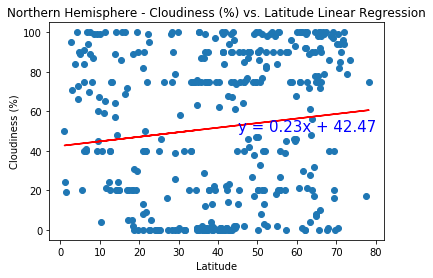

In [123]:
x_label = "Latitude"
y_label = "Cloudiness (%)"
label_pos = (45,50)
plot_title= "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
linear_regresion_plot(nothern_hemisphere[x_label],nothern_hemisphere[y_label],x_label,y_label,label_pos,plot_title,5)

Linear regression has a r-squared value of -0.1186. There is a weak linear relation between latitude and Cloudiness when both are increasing in the Northern Hemisphere. We can observe that 11.86% of the variance is explained by this linear model - weak correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression -squared is: 0.026164047693652766


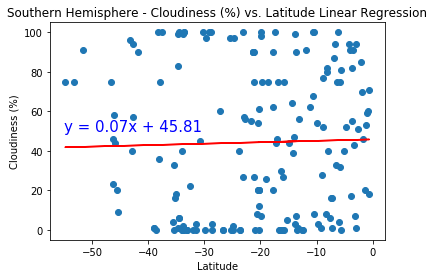

In [127]:
x_label = "Latitude"
y_label = "Cloudiness (%)"
label_pos = (-55,50)
plot_title= "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
linear_regresion_plot(southern_hemisphere[x_label],southern_hemisphere[y_label],x_label,y_label,label_pos,plot_title,6)

Linear regression has a r-squared value of -0.026. There is a minimum linear relation between latitude and Cloudiness when both are increasing in the Southern Hemisphere. We can observe that 2.61% of the variance is explained by this linear model - minimum correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression -squared is: 0.028753776553369734


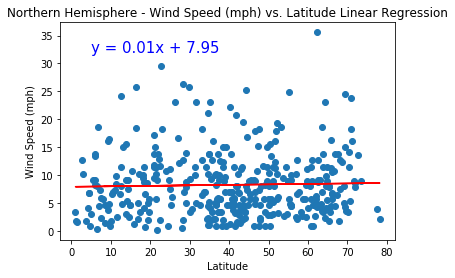

In [129]:
x_label = "Latitude"
y_label = "Wind Speed (mph)"
label_pos = (5,32)
plot_title= "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
linear_regresion_plot(nothern_hemisphere[x_label],nothern_hemisphere[y_label],x_label,y_label,label_pos,plot_title,7)

Linear regression has a r-squared value of -0.028. There is a minimum linear relation between latitude and wind speed when both are increasing in the Northern Hemisphere. We can observe that 2.8% of the variance is explained by this linear model - almost no correlation exist.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression -squared is: -0.1355755564100225


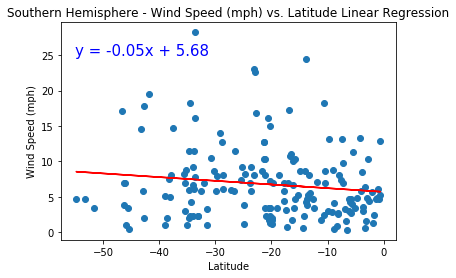

In [133]:
x_label = "Latitude"
y_label = "Wind Speed (mph)"
label_pos = (-55,25)
plot_title= "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
linear_regresion_plot(southern_hemisphere[x_label],southern_hemisphere[y_label],x_label,y_label,label_pos,plot_title,8)

Linear regression has a r-squared value of -0.135. There is a minimum linear relation between latitude and wind speed when both are increasing in the Southern Hemisphere. We can observe that 13.5% of the variance is explained by this linear model - Minimym correlation is appreciated.

### End of challenge